## Contextualización

En este notebook se va a continuar con lo tratado en el incial.  
Se parte del df con todas las variables ya limpias y se procede a realizar:
- La división entre train y test
- El análisis univariable
- El análisis vibariable con respecto a la target.
- La selección de las features que se tendrán en cuenta para el modelo.

## Importación librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

from EDA_function_tools import *
from toolbox_DS import *

## Carga de datos

In [2]:
# Cargo el archivo de train ya limpio y modelado
df = pd.read_csv('./data/df_precios_ordenadores.csv', index_col=0)
df.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Storage Type
id,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,1366x768,Full HD,Intel,Core i7,7500U,2.7,AMD,Radeon R7 M445,Dedicated,HDD
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,1366x768,Full HD,Intel,Pentium,Quad,1.1,Intel,HD Graphics 505,Unknown,HDD
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,1920x1080,Full HD,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown,SSD
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,3840x2160,4K Ultra HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1070,Dedicated,SSD
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,1920x1080,Full HD,Intel,Core i5,6300U,2.4,Intel,HD Graphics 520,Unknown,SSD
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,1920x1080,Full HD,Intel,Core i7,7500U,2.7,Nvidia,GeForce GT 940MX,Dedicated,SSD
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown,SSD
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,1920x1080,Full HD,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1050,Dedicated,SSD


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            912 non-null    object 
 1   TypeName           912 non-null    object 
 2   Inches             912 non-null    float64
 3   Ram                912 non-null    int64  
 4   OpSys              912 non-null    object 
 5   Weight             912 non-null    float64
 6   Price_euros        912 non-null    float64
 7   Resolution         912 non-null    object 
 8   Pantalla           912 non-null    object 
 9   Brand              912 non-null    object 
 10  Family             912 non-null    object 
 11  Model              912 non-null    object 
 12  Clock Speed (GHz)  912 non-null    float64
 13  Gpu Brand          912 non-null    object 
 14  Gpu Model          912 non-null    object 
 15  Gpu Type           912 non-null    object 
 16  Storage Type       912 non-n

## Listas de variables numéricas y categóricas

In [4]:
features_num = df.select_dtypes(['int','float']).columns.tolist()
features_cat = df.select_dtypes(['object','category']).columns.tolist()

In [5]:
features_num

['Inches', 'Ram', 'Weight', 'Price_euros', 'Clock Speed (GHz)']

In [6]:
features_cat

['Company',
 'TypeName',
 'OpSys',
 'Resolution',
 'Pantalla',
 'Brand',
 'Family',
 'Model',
 'Gpu Brand',
 'Gpu Model',
 'Gpu Type',
 'Storage Type']

## Análisis univariable

### Categóricas

Para Company
*************************


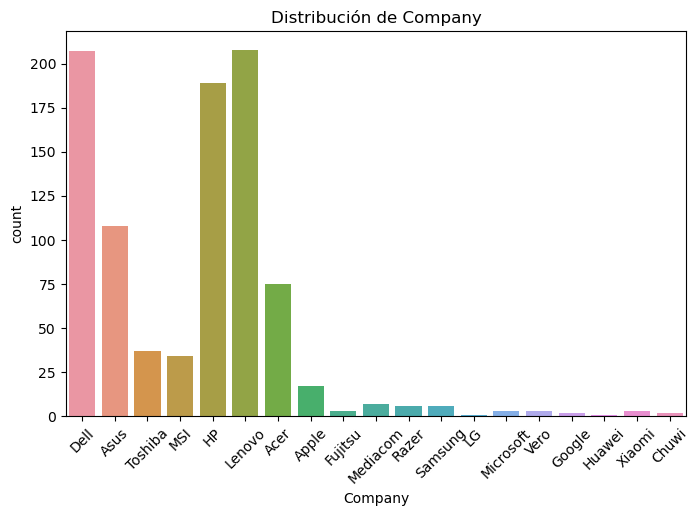

Frecuencia de categorías en Company:
Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

Porcentaje de categorías en Company:
Company
Lenovo       22.81
Dell         22.70
HP           20.72
Asus         11.84
Acer          8.22
Toshiba       4.06
MSI           3.73
Apple         1.86
Mediacom      0.77
Razer         0.66
Samsung       0.66
Fujitsu       0.33
Microsoft     0.33
Vero          0.33
Xiaomi        0.33
Google        0.22
Chuwi         0.22
LG            0.11
Huawei        0.11
Name: proportion, dtype: float64

La moda es Lenovo con una frecuencia de 208
Proporción de la moda: 22.81%

Para TypeName
*************************


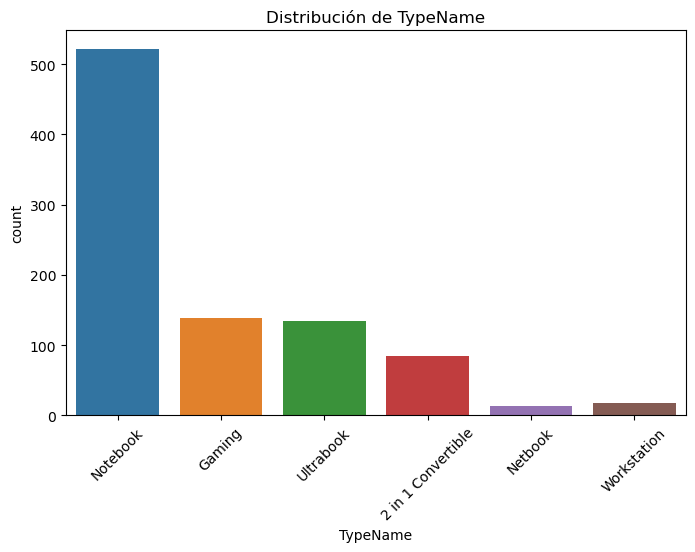

Frecuencia de categorías en TypeName:
TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

Porcentaje de categorías en TypeName:
TypeName
Notebook              57.24
Gaming                15.13
Ultrabook             14.80
2 in 1 Convertible     9.32
Workstation            1.97
Netbook                1.54
Name: proportion, dtype: float64

La moda es Notebook con una frecuencia de 522
Proporción de la moda: 57.24%

Para OpSys
*************************


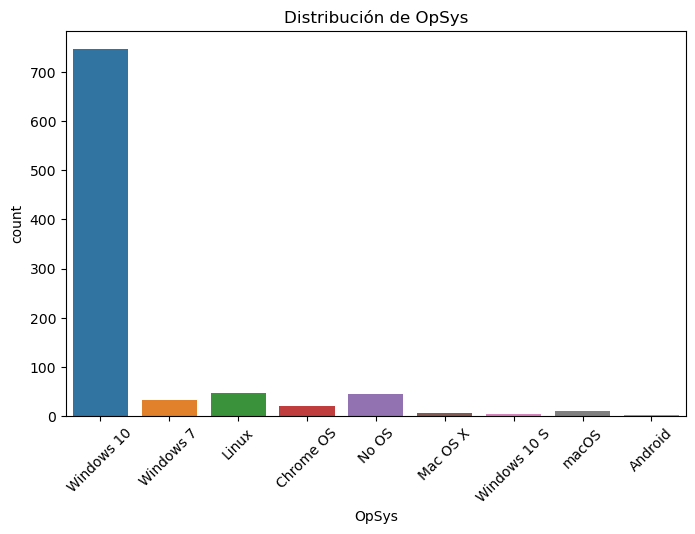

Frecuencia de categorías en OpSys:
OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

Porcentaje de categorías en OpSys:
OpSys
Windows 10      81.80
Linux            5.15
No OS            4.82
Windows 7        3.51
Chrome OS        2.19
macOS            1.21
Mac OS X         0.66
Windows 10 S     0.44
Android          0.22
Name: proportion, dtype: float64

La moda es Windows 10 con una frecuencia de 746
Proporción de la moda: 81.80%

Para Resolution
*************************


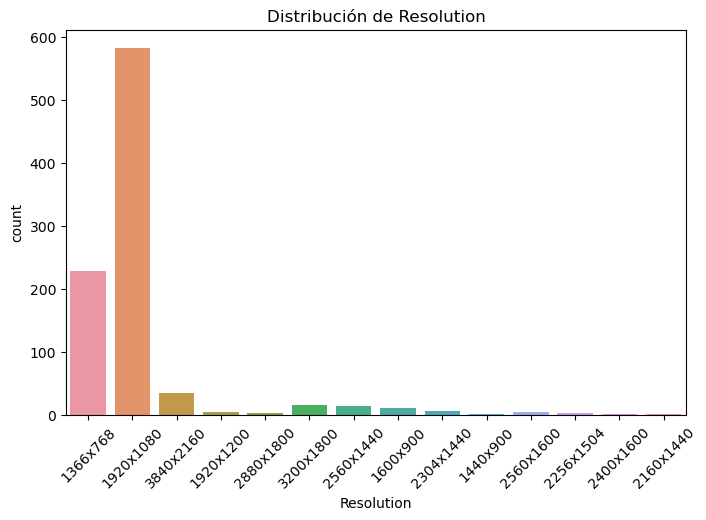

Frecuencia de categorías en Resolution:
Resolution
1920x1080    582
1366x768     229
3840x2160     34
3200x1800     15
2560x1440     14
1600x900      11
2304x1440      6
1920x1200      5
2560x1600      5
2880x1800      3
2256x1504      3
1440x900       2
2400x1600      2
2160x1440      1
Name: count, dtype: int64

Porcentaje de categorías en Resolution:
Resolution
1920x1080    63.82
1366x768     25.11
3840x2160     3.73
3200x1800     1.64
2560x1440     1.54
1600x900      1.21
2304x1440     0.66
1920x1200     0.55
2560x1600     0.55
2880x1800     0.33
2256x1504     0.33
1440x900      0.22
2400x1600     0.22
2160x1440     0.11
Name: proportion, dtype: float64

La moda es 1920x1080 con una frecuencia de 582
Proporción de la moda: 63.82%

Para Pantalla
*************************


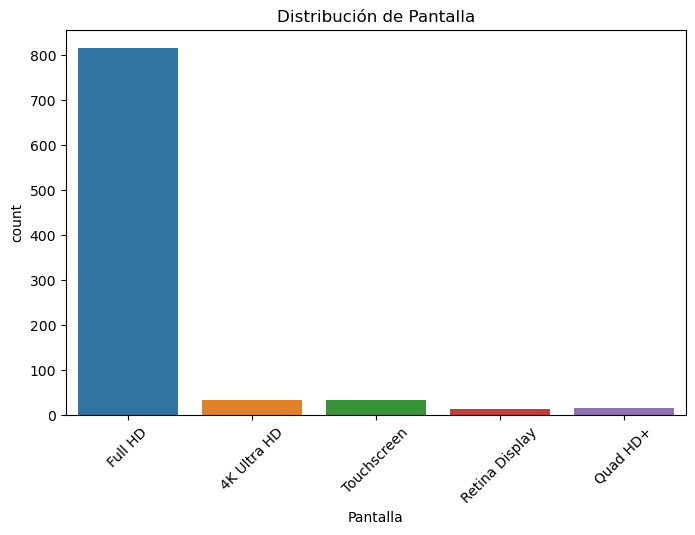

Frecuencia de categorías en Pantalla:
Pantalla
Full HD           815
4K Ultra HD        34
Touchscreen        33
Quad HD+           16
Retina Display     14
Name: count, dtype: int64

Porcentaje de categorías en Pantalla:
Pantalla
Full HD           89.36
4K Ultra HD        3.73
Touchscreen        3.62
Quad HD+           1.75
Retina Display     1.54
Name: proportion, dtype: float64

La moda es Full HD con una frecuencia de 815
Proporción de la moda: 89.36%

Para Brand
*************************


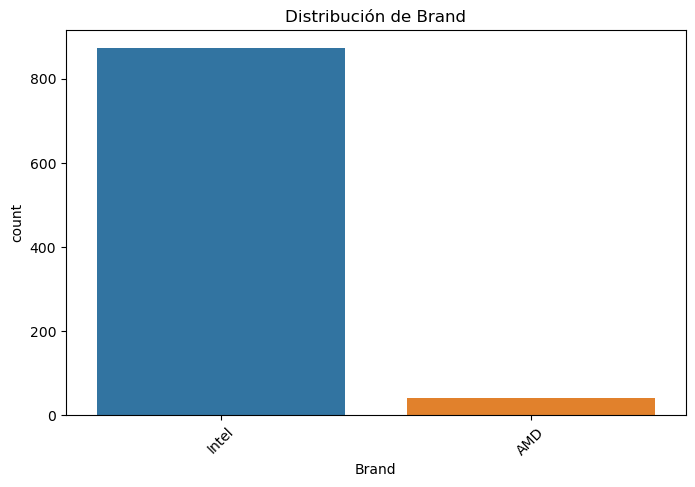

Frecuencia de categorías en Brand:
Brand
Intel    872
AMD       40
Name: count, dtype: int64

Porcentaje de categorías en Brand:
Brand
Intel    95.61
AMD       4.39
Name: proportion, dtype: float64

La moda es Intel con una frecuencia de 872
Proporción de la moda: 95.61%

Para Family
*************************


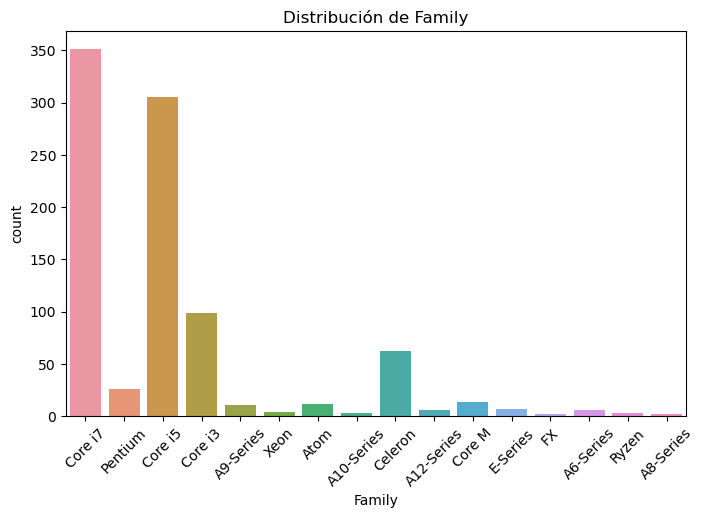

Frecuencia de categorías en Family:
Family
Core i7       351
Core i5       305
Core i3        99
Celeron        62
Pentium        26
Core M         13
Atom           12
A9-Series      11
E-Series        7
A12-Series      6
A6-Series       6
Xeon            4
A10-Series      3
Ryzen           3
FX              2
A8-Series       2
Name: count, dtype: int64

Porcentaje de categorías en Family:
Family
Core i7       38.49
Core i5       33.44
Core i3       10.86
Celeron        6.80
Pentium        2.85
Core M         1.43
Atom           1.32
A9-Series      1.21
E-Series       0.77
A12-Series     0.66
A6-Series      0.66
Xeon           0.44
A10-Series     0.33
Ryzen          0.33
FX             0.22
A8-Series      0.22
Name: proportion, dtype: float64

La moda es Core i7 con una frecuencia de 351
Proporción de la moda: 38.49%

Para Model
*************************


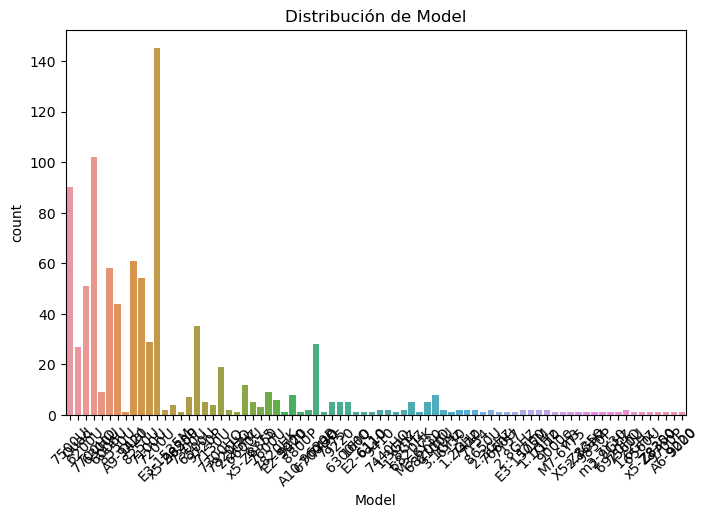

Frecuencia de categorías en Model:
Model
7200U      145
7700HQ     102
7500U       90
Dual        61
6006U       58
          ... 
1600         1
E2-6110      1
6110         1
M3-6Y30      1
9000         1
Name: count, Length: 78, dtype: int64

Porcentaje de categorías en Model:
Model
7200U      15.90
7700HQ     11.18
7500U       9.87
Dual        6.69
6006U       6.36
           ...  
1600        0.11
E2-6110     0.11
6110        0.11
M3-6Y30     0.11
9000        0.11
Name: proportion, Length: 78, dtype: float64

La moda es 7200U con una frecuencia de 145
Proporción de la moda: 15.90%

Para Gpu Brand
*************************


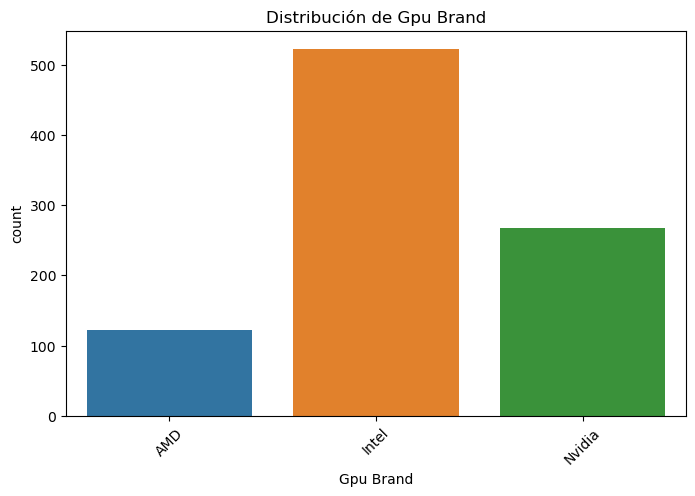

Frecuencia de categorías en Gpu Brand:
Gpu Brand
Intel     522
Nvidia    268
AMD       122
Name: count, dtype: int64

Porcentaje de categorías en Gpu Brand:
Gpu Brand
Intel     57.24
Nvidia    29.39
AMD       13.38
Name: proportion, dtype: float64

La moda es Intel con una frecuencia de 522
Proporción de la moda: 57.24%

Para Gpu Model
*************************


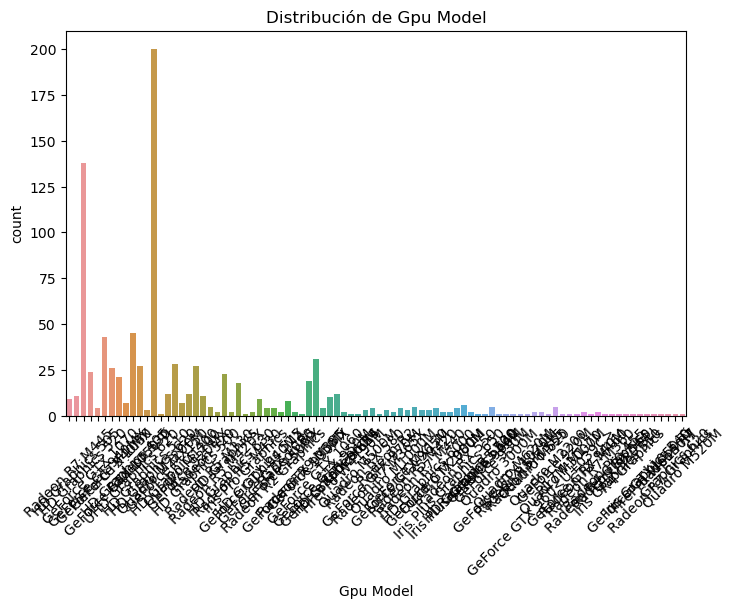

Frecuencia de categorías en Gpu Model:
Gpu Model
HD Graphics 620      200
HD Graphics 520      138
UHD Graphics 620      45
GeForce GTX 1050      43
GeForce GTX 1060      31
                    ... 
Radeon R4              1
Radeon R9 M385         1
Iris Pro Graphics      1
Quadro M2200M          1
Quadro M520M           1
Name: count, Length: 88, dtype: int64

Porcentaje de categorías en Gpu Model:
Gpu Model
HD Graphics 620      21.93
HD Graphics 520      15.13
UHD Graphics 620      4.93
GeForce GTX 1050      4.71
GeForce GTX 1060      3.40
                     ...  
Radeon R4             0.11
Radeon R9 M385        0.11
Iris Pro Graphics     0.11
Quadro M2200M         0.11
Quadro M520M          0.11
Name: proportion, Length: 88, dtype: float64

La moda es HD Graphics 620 con una frecuencia de 200
Proporción de la moda: 21.93%

Para Gpu Type
*************************


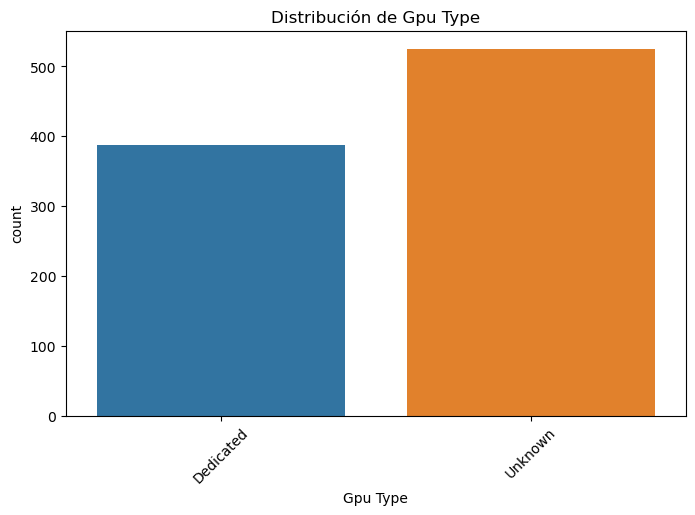

Frecuencia de categorías en Gpu Type:
Gpu Type
Unknown      525
Dedicated    387
Name: count, dtype: int64

Porcentaje de categorías en Gpu Type:
Gpu Type
Unknown      57.57
Dedicated    42.43
Name: proportion, dtype: float64

La moda es Unknown con una frecuencia de 525
Proporción de la moda: 57.57%

Para Storage Type
*************************


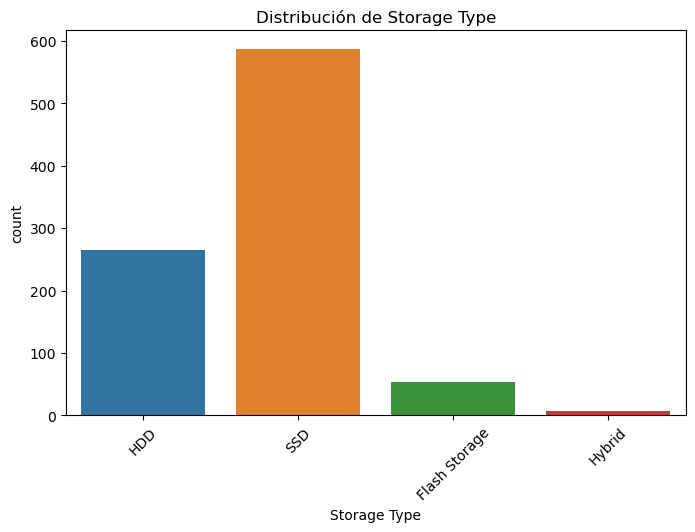

Frecuencia de categorías en Storage Type:
Storage Type
SSD              587
HDD              265
Flash Storage     53
Hybrid             7
Name: count, dtype: int64

Porcentaje de categorías en Storage Type:
Storage Type
SSD              64.36
HDD              29.06
Flash Storage     5.81
Hybrid            0.77
Name: proportion, dtype: float64

La moda es SSD con una frecuencia de 587
Proporción de la moda: 64.36%



In [7]:
analisis_univariable_categoricas(df,features_cat)

### Numéricas

Para Inches
*************************


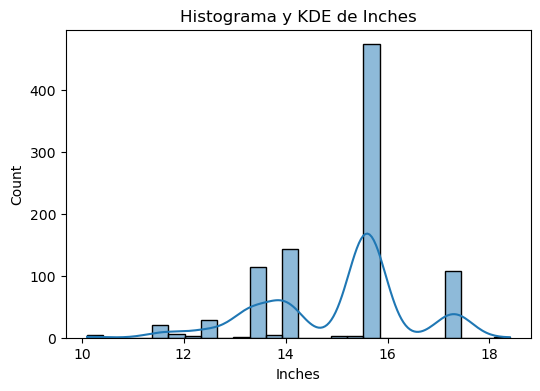

count    912.00
mean      15.01
std        1.41
min       10.10
25%       14.00
50%       15.60
75%       15.60
max       18.40
Name: Inches, dtype: float64

La moda es 15.60, el coeficiente de variación es 9.40% y el IQR es 1.60

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 0.09. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=59.04

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Ram
*************************


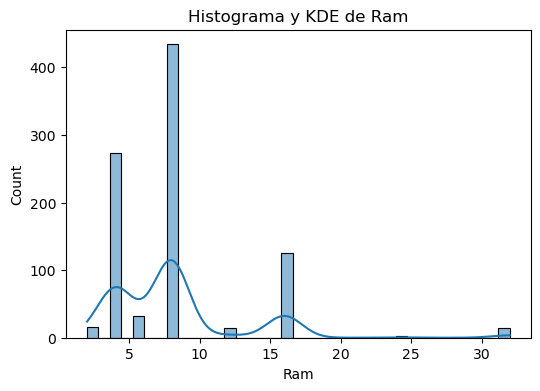

count    912.00
mean       8.19
std        4.90
min        2.00
25%        4.00
50%        8.00
75%        8.00
max       32.00
Name: Ram, dtype: float64

La moda es 8.00, el coeficiente de variación es 59.84% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.18, valores extendidos a la derecha

Curtosis: 6.92. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=81.66

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 16 y suponen en proporción 1.75%

La variable Ram puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.92, asimetria=2.18

Para Weight
*************************


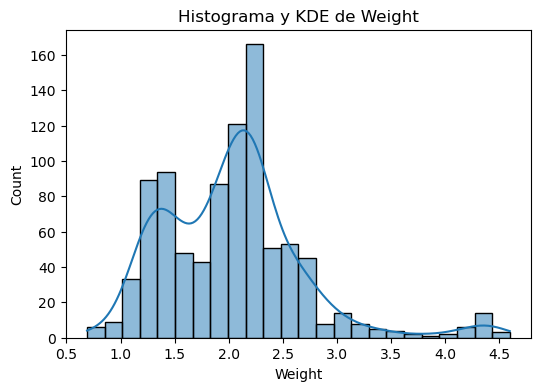

count    912.00
mean       2.03
std        0.65
min        0.69
25%        1.50
50%        2.04
75%        2.30
max        4.60
Name: Weight, dtype: float64

La moda es 2.20, el coeficiente de variación es 32.17% y el IQR es 0.80

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.13, valores extendidos a la derecha

Curtosis: 2.59. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=12.72

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Price_euros
*************************


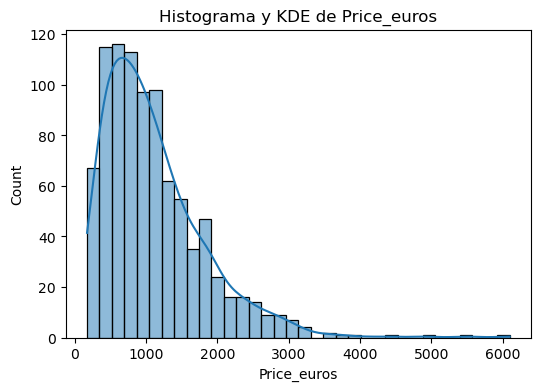

count     912.00
mean     1108.12
std       714.60
min       174.00
25%       589.00
50%       949.00
75%      1458.50
max      6099.00
Name: Price_euros, dtype: float64

La moda es 1099.00, el coeficiente de variación es 64.49% y el IQR es 869.50

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.72, valores extendidos a la derecha

Curtosis: 5.47. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=22.96

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.44%

La variable Price_euros puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=5.47, asimetria=1.72

Para Clock Speed (GHz)
*************************


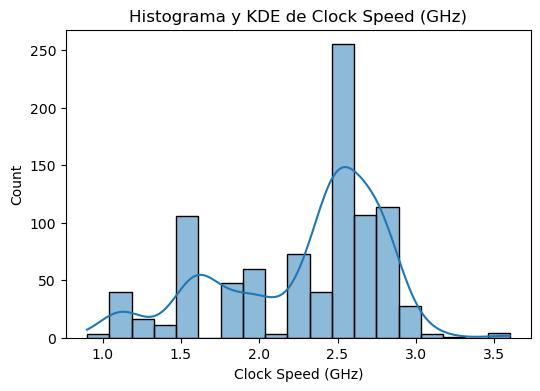

count    912.00
mean       2.29
std        0.51
min        0.90
25%        2.00
50%        2.50
75%        2.70
max        3.60
Name: Clock Speed (GHz), dtype: float64

La moda es 2.50, el coeficiente de variación es 22.43% y el IQR es 0.70

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: -0.79, valores extendidos a la izquierda

Curtosis: -0.24. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=39.99

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

features_log: ['Ram', 'Price_euros']

features_no_log: ['Inches', 'Weight', 'Clock Speed (GHz)']


,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
Inches,0.0,0.0,59.04,-0.49,0.09,0.0,0.00,False
Ram,0.0,0.0,81.66,2.18,6.92,0.0,1.75,True
Weight,0.0,0.0,12.72,1.13,2.59,0.0,0.00,False
Price_euros,0.0,0.0,22.96,1.72,5.47,0.0,0.44,True
Clock Speed (GHz),0.0,0.0,39.99,-0.79,-0.24,0.0,0.00,False


In [8]:
analisis_univariable_numericas(df,features_num)

## Análisis Bivariable

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

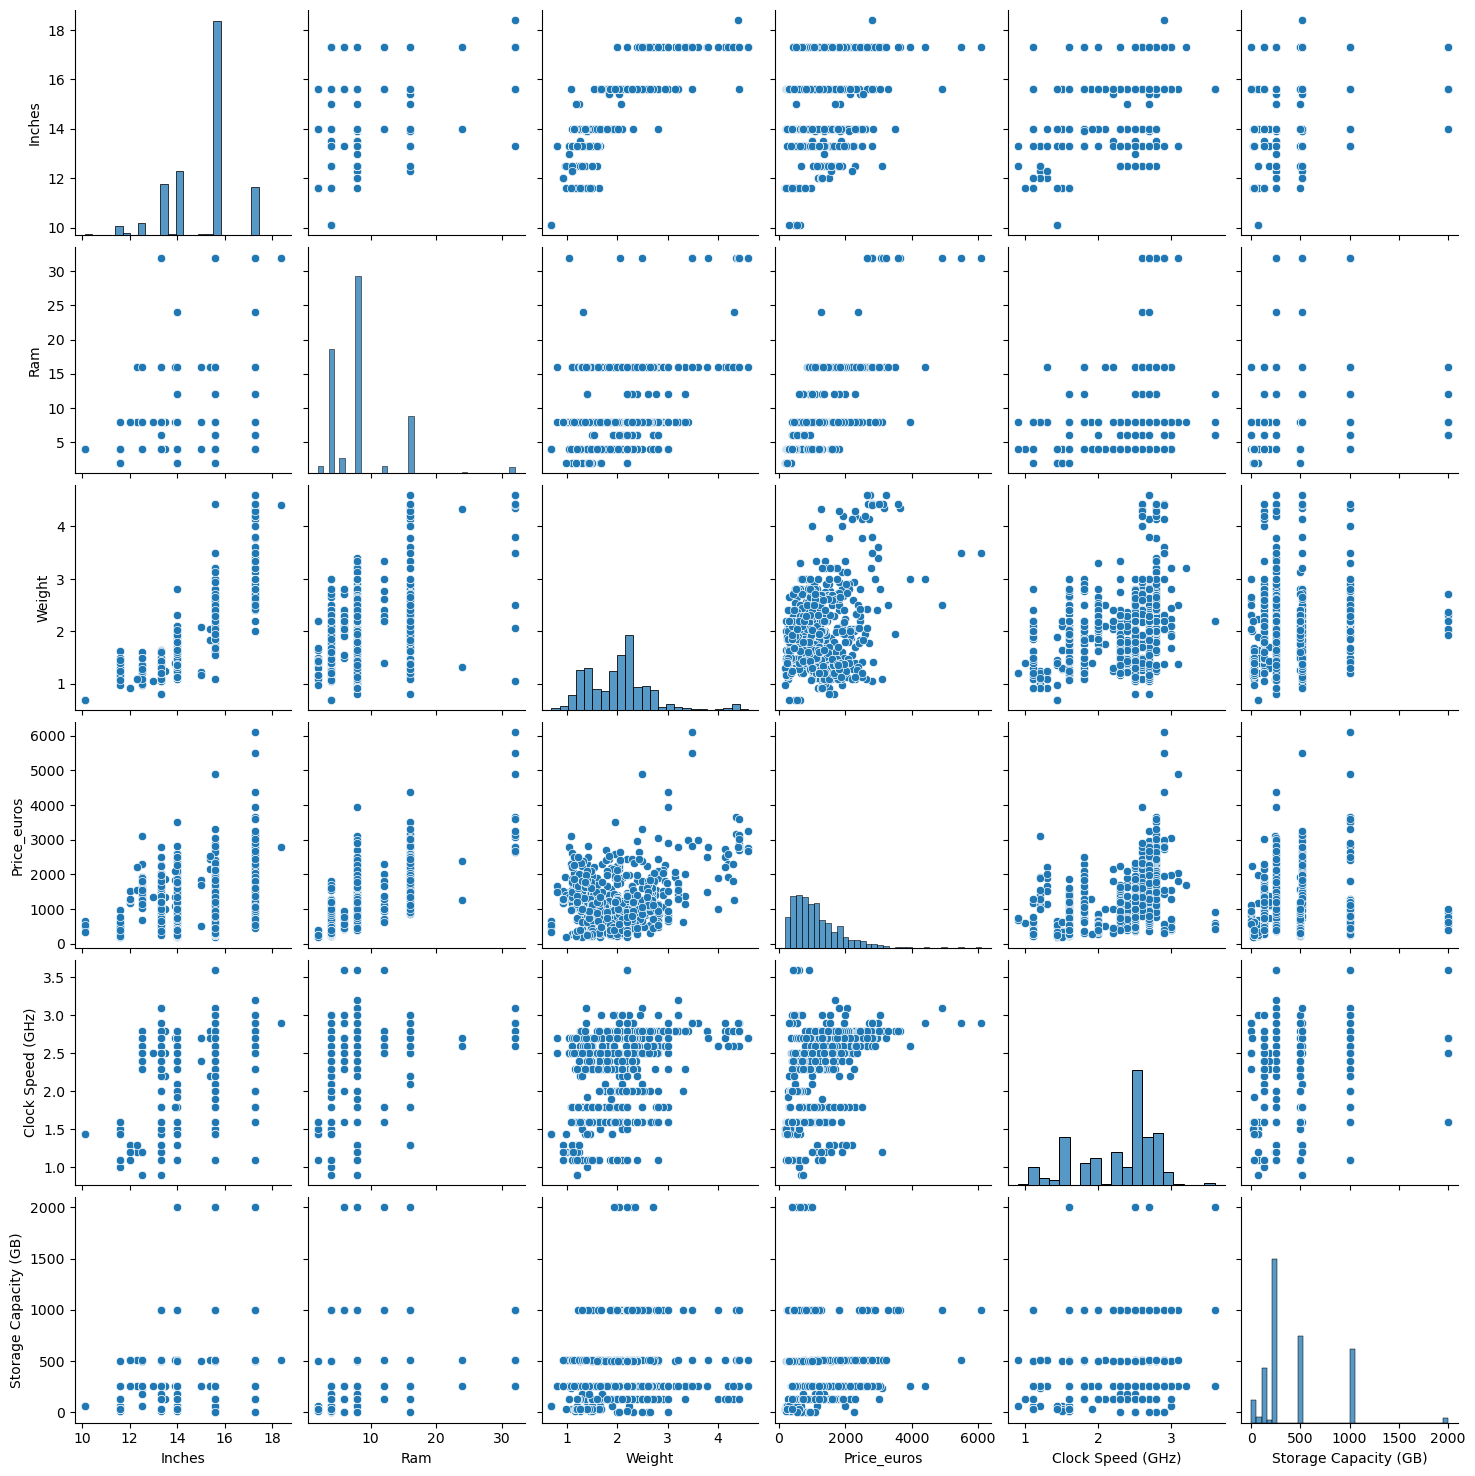

In [15]:
# sns.pairplot(df)

In [10]:
# Saco la target de la listas de features
features_num.remove('Price_euros')


ValueError: list.remove(x): x not in list

### Categóricas con target

### Numéricas con target


Matriz de correlación con la variable target:
Ram                  0.747748
Clock Speed (GHz)    0.439406
Weight               0.231864
Inches               0.077798
Name: Price_euros, dtype: float64



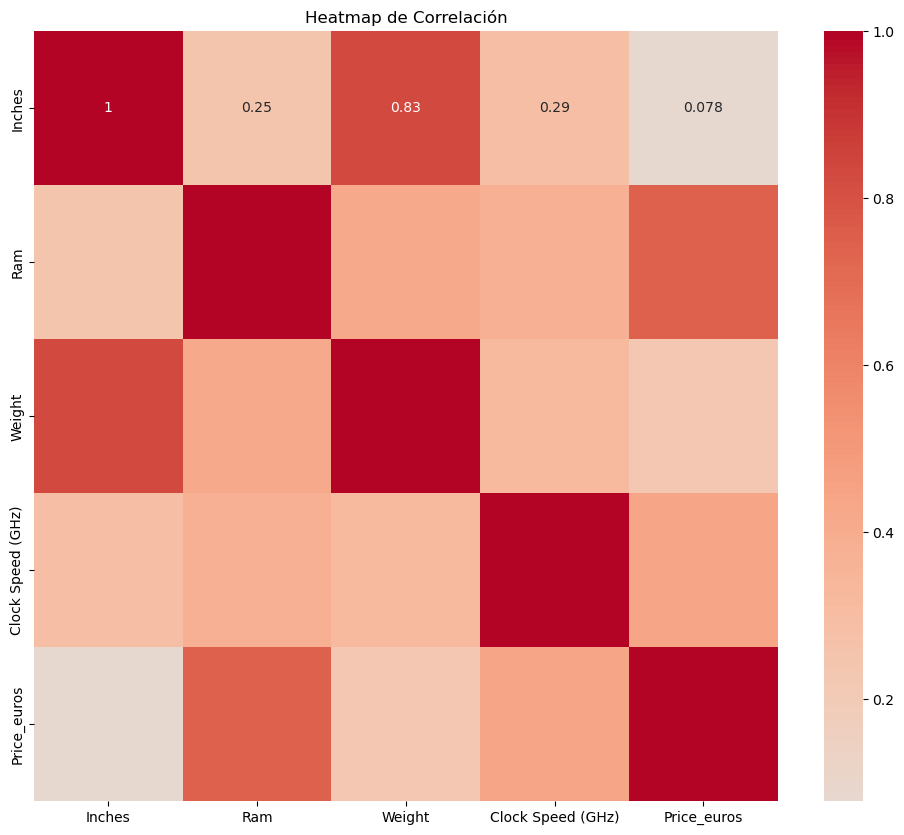

Variables con correlación por debajo del 20%: ['Inches']
Variables con correlación por encima del 20%: ['Ram', 'Weight', 'Clock Speed (GHz)', 'Price_euros']

Prueba de correlación para Inches vs Price_euros
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: -0.05
p-valor: 0.122
La variable Inches no está significativamente asociada con Price_euros (p >= 0.05 o correlación < 0.2).

Prueba de correlación para Ram vs Price_euros
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: 0.76
p-valor: 0.000
La variable Ram está significativamente asociada con Price_euros (p < 0.05 y correlación >= 0.2). Podría ser útil para el modelo.

Prueba de correlación para Weight vs Price_euros
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: 0.23
p-valor: 0.000
La variable Weight está significativamente asociada con Price_euros (p < 0.05 y correlación >

{'significant_vars': ['Ram', 'Weight', 'Clock Speed (GHz)'],
 'high_vif_vars': ['Weight', 'Clock Speed (GHz)'],
 'high_corr_vars': [],
 'low_corr_vars': []}

In [11]:
analisis_bivariable_numericas_numerica(df,'Price_euros',features_num)

## Selección de features y base line

### Primera pueba con selección visual

In [28]:
features_selec_visual = ['Company', 'TypeName', 'OpSys', 'Resolution', 'Pantalla', 'Brand', 'Family', 'CPU_Model_disc', 'Gpu Brand', 'Gpu Type', 'GPU_Model_disc', 'Storage Type','Ram', 'Weight', 'Clock Speed (GHz)']
features_cat_visual = ['Company', 'TypeName', 'OpSys', 'Resolution', 'Pantalla', 'Brand', 'Family', 'CPU_Model_disc','Gpu Brand', 'GPU_Model_disc', 'Gpu Type', 'Storage Type']

In [29]:
df_visual = df[features_selec_visual]

In [30]:
df_visual.shape

(912, 15)

#### Tratamiento features categóricas

In [31]:
df_visual = pd.get_dummies(df_visual,columns=features_cat_visual,dtype=int)

In [33]:
X_train_visual = df_visual # Se quitó ya la variable target
y_train_visual = df['Price_euros']
print('X_train', X_train_visual.shape)
print('y_train',y_train_visual.shape)

X_train (912, 89)
y_train (912,)


In [34]:
X_train_visual.columns

Index(['Ram', 'Weight', 'Clock Speed (GHz)', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Resolution_1366x768',
       'Resolution_1440x900', 'Resolution_1600x900', 'Resolution_1920x1080',
       'Resolution_1920x1200', 'Resolution_2160x1440', 'Resolution_2256x1504',
       'Resolution_2304x1440', 'Resolution_2400x1600', 'Resolution_2560x1440',
  

In [81]:
features_visual_final = X_train_visual.columns.tolist()

## Modelos de aprendizaje

In [35]:
lin_reg = LinearRegression()
rf_model = RandomForestRegressor(max_depth=5, random_state=42)
xgb = XGBRFRegressor(max_depth = 5, random_state = 42)
knn = KNeighborsRegressor(n_neighbors=5)

In [36]:
# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','XGBoostRegressor','KNN']

# Variables con modelos:
model_list = [lin_reg,rf_model,xgb,knn]

for j, modelo in enumerate(model_list):
    score = np.mean(cross_val_score(modelo, X_train_visual, y_train_visual, cv=5, scoring='neg_median_absolute_error')).round(2)
    print(f'modelo: {model_name[j]}: {score}')

modelo: LinearRegression: -163.01
modelo: RandomForestregression: -153.53
modelo: XGBoostRegressor: -153.94
modelo: KNN: -125.99


Sorprendentemente el que menor error da es el KNN.  
Pruebo a optimizar los hiperparámetros

In [37]:
param_grid_knn_reg = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instanciar el modelo KNN para regresión
knn_reg = KNeighborsRegressor()

# Realizar la búsqueda de hiperparámetros
knn_reg_grid = GridSearchCV(estimator=knn_reg,
                                param_grid=param_grid_knn_reg,
                                scoring='neg_median_absolute_error',
                                cv=5,
                                n_jobs=-1)

knn_reg_grid.fit(X_train_visual, y_train_visual)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_median_absolute_error')

In [38]:
best_model_knn_reg = knn_reg_grid.best_estimator_
best_params_knn_reg = knn_reg_grid.best_params_
best_score_knn_reg = knn_reg_grid.best_score_

print(f'Best Parameters for Regression: {best_params_knn_reg}')
print(f'Best Score for Regression: {best_score_knn_reg}')

Best Parameters for Regression: {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
Best Score for Regression: -118.2735129801088


In [39]:
y_predict_knn_grid = knn_reg_grid.predict(X_train_visual)
mae = mean_absolute_error(y_train_visual,y_predict_knn_grid)
print('MAE selección visual:',mae)

MAE selección visual: 13.852474415204679


Overfitting!!!!!?????

### Selección de features con ML

Parto de todas las features, convirtiendo las categóricas a numéricas

In [40]:
features_cat_engin = features_cat_visual

features_cat_engin

['Company',
 'TypeName',
 'OpSys',
 'Resolution',
 'Pantalla',
 'Brand',
 'Family',
 'CPU_Model_disc',
 'Gpu Brand',
 'GPU_Model_disc',
 'Gpu Type',
 'Storage Type']

Tratamiento de features para todas las variables categóricas

In [41]:
df_engin = pd.get_dummies(df,columns=features_cat_engin, dtype=int)
df_engin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 99 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   ScreenResolution             912 non-null    object 
 2   Cpu                          912 non-null    object 
 3   Ram                          912 non-null    float64
 4   Memory                       912 non-null    object 
 5   Gpu                          912 non-null    object 
 6   Weight                       912 non-null    float64
 7   Price_euros                  912 non-null    float64
 8   Model                        912 non-null    object 
 9   Clock Speed (GHz)            912 non-null    float64
 10  Gpu Model                    912 non-null    object 
 11  Storage Capacity (GB)        912 non-null    int64  
 12  Price_disc                   912 non-null    object 
 13  Company_Acer          

In [46]:
df_engin.columns

Index(['Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'Weight',
       'Price_euros', 'Model', 'Clock Speed (GHz)', 'Gpu Model',
       'Storage Capacity (GB)', 'Price_disc', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Resolution_1366x768',
       'Resolution_1440x900', 'Resolution_1600x900', 'Resolution_1920x1080',
       'Resoluti

In [47]:
columnas_eliminar = df_engin.select_dtypes(include='object').columns.tolist()
columnas_eliminar


['ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'Model',
 'Gpu Model',
 'Price_disc']

In [52]:

X_train_engin = df_engin.drop(columns=columnas_eliminar)
X_train_engin=X_train_engin.drop(columns='Price_euros')
y_train_engin = df['Price_euros']
print('X_train_engin', X_train_engin.shape)
print('y_train',y_train_engin.shape)

X_train_engin (912, 91)
y_train (912,)


In [53]:
X_train_engin.columns

Index(['Inches', 'Ram', 'Weight', 'Clock Speed (GHz)', 'Storage Capacity (GB)',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Resolution_1366x768',
       'Resolution_1440x900', 'Resolution_1600x900', 'Resolution_1920x1080',
       'Resolution_1920x1200', 'Resolution_2160x1440', 'Resolution_2256x1504',
       'Resolution_2304x1440', 'Resolution_240

Hago lo mismo a test

In [102]:
df_test = pd.get_dummies(df_test,columns=features_cat_engin, dtype=int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 181 to 1036
Data columns (total 96 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       391 non-null    float64
 1   ScreenResolution             391 non-null    object 
 2   Cpu                          391 non-null    object 
 3   Ram                          391 non-null    int64  
 4   Memory                       391 non-null    object 
 5   Gpu                          391 non-null    object 
 6   Weight                       391 non-null    float64
 7   Model                        391 non-null    object 
 8   Clock Speed (GHz)            391 non-null    float64
 9   Gpu Model                    391 non-null    object 
 10  Storage Capacity (GB)        391 non-null    int64  
 11  Company_Acer                 391 non-null    int32  
 12  Company_Apple                391 non-null    int32  
 13  Company_Asus          

In [107]:
X_test = df_test.drop(columns=['ScreenResolution','Cpu','Memory', 'Gpu', 'Model', 'Gpu Model'])
X_test.shape

(391, 90)

In [116]:
# Encontrar columnas en X_train_engin que no están en X_test
columns_train_not_in_test = set(X_train_engin.columns) - set(X_test.columns)
print("Columnas en X_train_engin pero no en X_test:", columns_train_not_in_test)

# Encontrar columnas en X_test que no están en X_train_engin
columns_test_not_in_train = set(X_test.columns) - set(X_train_engin.columns)
print("Columnas en X_test pero no en X_train_engin:", columns_test_not_in_train)

Columnas en X_train_engin pero no en X_test: {'Family_FX', 'Resolution_1920x1200', 'OpSys_Android', 'Company_Mediacom', 'Resolution_2304x1440', 'Family_Xeon', 'Company_Fujitsu'}
Columnas en X_test pero no en X_train_engin: {'Brand_Samsung', 'Family_A4-Series', 'Family_Cortex', 'Gpu Brand_ARM', 'CPU_Model_disc_Desconocida', 'Resolution_2736x1824'}


Diferencias entre columnas entre X_test y X_train por datos de test que no están en Train y viceversa

In [117]:
# Columnas diferentes, ChatGPT me dice que haga esto....
X_train_reindex = X_train_engin.reindex(columns=X_test.columns, fill_value=0)
X_test_reindex = X_test.reindex(columns=X_train_engin.columns, fill_value=0)

In [119]:
all_columns = set(X_train_reindex.columns).union(set(X_test_reindex.columns))

# Reindexar ambos conjuntos de datos para que tengan las mismas columnas
X_train_dummies = X_train_reindex.reindex(columns=all_columns, fill_value=0)
X_test_dummies = X_test_reindex.reindex(columns=all_columns, fill_value=0)

In [121]:
# Encontrar columnas en X_train_engin que no están en X_test
columns_train_not_in_test = set(X_train_dummies.columns) - set(X_test_dummies.columns)
print("Columnas en X_train_engin pero no en X_test:", columns_train_not_in_test)

# Encontrar columnas en X_test que no están en X_train_engin
columns_test_not_in_train = set(X_test_dummies.columns) - set(X_train_dummies.columns)
print("Columnas en X_test pero no en X_train_engin:", columns_test_not_in_train)

Columnas en X_train_engin pero no en X_test: set()
Columnas en X_test pero no en X_train_engin: set()


____

ESta parte la dejo con los valores anteriores de X_train_engine y hago una nueva abajo para los valores de X_train_dummies

#### Selección de features numéricas mediante SelectKBeest y Anova

In [77]:
selector =SelectKBest(f_regression, k = 30)

x_data_kbest = selector.fit_transform(X_train_engin, y_train_engin)

X_train_kBest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kBest.columns

Index(['Ram', 'Weight', 'Clock Speed (GHz)', 'Company_Acer', 'Company_Razer',
       'TypeName_Gaming', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Resolution_1366x768', 'Resolution_2560x1440',
       'Resolution_3840x2160', 'Pantalla_4K Ultra HD', 'Pantalla_Full HD',
       'Family_Celeron', 'Family_Core i3', 'Family_Core i7', 'Family_Xeon',
       'CPU_Model_disc_Alta', 'CPU_Model_disc_Baja', 'Gpu Brand_AMD',
       'Gpu Brand_Intel', 'Gpu Brand_Nvidia', 'GPU_Model_disc_Alta',
       'GPU_Model_disc_Baja', 'Gpu Type_Dedicated', 'Gpu Type_Unknown',
       'Storage Type_Flash Storage', 'Storage Type_HDD', 'Storage Type_SSD'],
      dtype='object')

In [63]:
features_anova = X_train_kBest.columns

#### Selección usando modelo SelectFromModel

In [64]:
rf_selector = RandomForestRegressor(max_depth=5,random_state=42)
rf_selector.fit(X_train_engin, y_train_engin)

RandomForestRegressor(max_depth=5, random_state=42)

In [65]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.50829188, 0.08701915, 0.02421146, 0.01528657, 0.01898699,
       0.04111331, 0.01227492, 0.01113925, 0.18460681])

In [66]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'median')

# Entrenamos
selector_model.fit(X_train_engin,y_train_engin)

SelectFromModel(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                threshold='median')

In [67]:
selector_model.get_feature_names_out()

array(['Inches', 'Ram', 'Weight', 'Clock Speed (GHz)',
       'Storage Capacity (GB)', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_Razer', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7',
       'Resolution_1366x768', 'Resolution_1920x1080',
       'Resolution_2560x1440', 'Resolution_3200x1800',
       'Resolution_3840x2160', 'Pantalla_4K Ultra HD', 'Pantalla_Full HD',
       'Pantalla_Quad HD+', 'Pantalla_Touchscreen', 'Brand_AMD',
       'Brand_Intel', 'Family_Celeron', 'Family_Core M', 'Family_Core i3',
       'Family_Core i5', 'Family_Core i7', 'Family_Xeon',
       'CPU_Model_disc_Baja', 'CPU_Model_disc_Media', 'Gpu Brand_AMD',
       'Gpu Brand_Nvidia', 'GPU_Model_disc_Alta', 'GPU_Model_disc_Media',
       'Gpu Type_Dedicated', 'Gpu Type_Unknown', 'Storage Type_HDD',
       'Storage Ty

In [68]:
features_selector = selector_model.get_feature_names_out()

#### Selección usando RFE

In [78]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestRegressor(max_depth=5,random_state=42)
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=30,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train_engin,y_train_engin)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:30]

[ 1  1  1  1  1 31 30  1 26  1 36 35  1 32 49  6 15 56 54  1 41 12 27 52
  3  1 29  1  1  1 46 48 25 51  4  1 24  1 37  2 45 39  1 59 61 62 58 50
  1 44 38  7  1  1  1 19 47 13 16 10 33 55 40 42 43 23  1 17  9  1  1 60
 57 21 53  1 14  1  1  5 20  8  1 28  1 18 11 22  1 34  1]


,ranking
Inches,1
TypeName_Ultrabook,1
TypeName_Workstation,1
OpSys_Windows 10,1
OpSys_Windows 7,1
Resolution_1920x1080,1
Resolution_2560x1440,1
Resolution_3840x2160,1
Pantalla_4K Ultra HD,1
TypeName_Notebook,1


In [79]:
temp = pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:30]
temp.index[:30]
features_rfe = temp.index[:30]

#### Selección por SFS

In [80]:
# Instancio modelo clasificación
rf_sfs = RandomForestRegressor(max_depth=5,random_state=42)
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=30,
    cv = 4,
    scoring='neg_median_absolute_error' 
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train_engin,y_train_engin)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(max_depth=5,
                                                          random_state=42),
                          n_features_to_select=30,
                          scoring='neg_median_absolute_error')

In [82]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['Inches' 'Ram' 'Weight' 'Storage Capacity (GB)' 'Company_Apple'
 'Company_Asus' 'Company_Toshiba' 'Company_Vero' 'Company_Xiaomi'
 'OpSys_Android' 'OpSys_Linux' 'OpSys_Mac OS X' 'OpSys_macOS'
 'Resolution_1920x1200' 'Resolution_2304x1440' 'Resolution_2400x1600'
 'Resolution_2560x1440' 'Resolution_2560x1600' 'Family_A10-Series'
 'Family_A6-Series' 'Family_A9-Series' 'Family_Atom' 'Family_Core i3'
 'Family_Core i5' 'Family_E-Series' 'Family_Pentium' 'Family_Ryzen'
 'CPU_Model_disc_Baja' 'CPU_Model_disc_Media' 'GPU_Model_disc_Media']


In [83]:
features_sfs = sfs_fordward.get_feature_names_out()

#### Prueba mejores modelos con cross_val_score

In [84]:
# Lista de features
features_list = [features_visual_final, features_anova, features_selector,features_rfe,features_sfs]
features_list_name = ['Visual','ANNOVA', 'SelectFromModel','RFE','SFS']

# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','XGBoostRegressor','KNN']

# Variables con modelos:
model_list = [lin_reg,rf_model,xgb,knn]

for i,lista in enumerate(features_list):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, X_train_engin[lista], y_train_engin, cv = 5, scoring = 'neg_median_absolute_error')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()

Lista: Visual y modelo: LinearRegression: -163.01
Lista: Visual y modelo: RandomForestregression: -153.53
Lista: Visual y modelo: XGBoostRegressor: -153.94
Lista: Visual y modelo: KNN: -125.99

Lista: ANNOVA y modelo: LinearRegression: -188.74
Lista: ANNOVA y modelo: RandomForestregression: -169.74
Lista: ANNOVA y modelo: XGBoostRegressor: -164.23
Lista: ANNOVA y modelo: KNN: -159.17

Lista: SelectFromModel y modelo: LinearRegression: -158.58
Lista: SelectFromModel y modelo: RandomForestregression: -152.63
Lista: SelectFromModel y modelo: XGBoostRegressor: -153.81
Lista: SelectFromModel y modelo: KNN: -143.7

Lista: RFE y modelo: LinearRegression: -167.88
Lista: RFE y modelo: RandomForestregression: -152.15
Lista: RFE y modelo: XGBoostRegressor: -152.31
Lista: RFE y modelo: KNN: -140.32

Lista: SFS y modelo: LinearRegression: -222.86
Lista: SFS y modelo: RandomForestregression: -152.31
Lista: SFS y modelo: XGBoostRegressor: -153.24
Lista: SFS y modelo: KNN: -160.6



### Optimización hiperparámetros


Para RandomForest

In [85]:
X_train_model = df_engin[features_rfe]

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['absolute_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model_grid = GridSearchCV(estimator=rf_model,
							   param_grid=param_grid,
							   scoring='neg_median_absolute_error',
							   cv=5,
							   n_jobs=-1)

rf_model_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_median_absolute_error')

In [86]:
best_model_clf = rf_model_grid.best_estimator_
best_params_clf = rf_model_grid.best_params_
best_score_clf = rf_model_grid.best_score_

print(f'Best Parameters for Classification: {best_params_clf}')
print(f'Best Score for Classification: {best_score_clf}')

Best Parameters for Classification: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Classification: -107.05955249999988


In [87]:
y_predict = rf_model_grid.predict(X_train_model)

mae = mean_absolute_error(y_train_engin, y_predict)
print('MAE',mae)

MAE 14.952598190789537


In [94]:
y_predict

array([ 754.257325,  449.391275, 1446.0251  , 2868.456825, 1696.55035 ,
       1107.895   ,  416.217125, 1151.4575  , 1197.57275 , 1670.1825  ,
        312.891275,  863.041175, 1094.7967  ,  646.574875,  501.574375,
       1094.8384  ,  638.5074  ,  554.2785  , 4887.7     ,  859.1475  ,
        562.2418  ,  653.69525 , 1390.94325 , 1376.63    , 2707.968425,
        390.368325,  567.889125,  700.649125,  307.104   ,  981.98885 ,
        741.585075, 1261.9775  ,  898.692225,  577.782775,  357.905   ,
        575.864225,  407.816425,  367.95    ,  377.921375, 1060.950425,
       1100.309725, 1089.975   ,  693.953275, 1414.684975,  499.22345 ,
       1252.82015 ,  419.344075,  477.01755 , 2114.96425 , 1021.66535 ,
        399.125225, 1552.037   ,  724.259   ,  346.984   ,  652.6319  ,
       1712.682475, 1092.31265 , 1515.986675,  239.405   , 1927.82    ,
        416.369075,  467.881425,  282.23    , 1440.013275, 1100.309725,
       1890.737975, 1110.40765 ,  636.57635 ,  349.0243  ,  347.

Para KNN


In [91]:
X_train_model = df_engin[features_visual_final]

param_grid_knn_reg = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instanciar el modelo KNN para regresión
knn_hip = KNeighborsRegressor()

# Realizar la búsqueda de hiperparámetros
knn_hip_grid = GridSearchCV(estimator=knn_reg,
                                param_grid=param_grid_knn_reg,
                                scoring='neg_median_absolute_error',
                                cv=5,
                                n_jobs=-1)

knn_hip_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_median_absolute_error')

In [92]:
# Obtener el mejor modelo y sus parámetros
best_model_knn_hip = knn_hip_grid.best_estimator_
best_params_knn_hip = knn_hip_grid.best_params_
best_score_knn_hip = knn_hip_grid.best_score_

In [93]:
print(f'Best Parameters for Regression: {best_params_knn_hip}')
print(f'Best Score for Regression: {best_score_knn_hip}')

Best Parameters for Regression: {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
Best Score for Regression: -118.2735129801088


In [98]:
import joblib
import os

model_path = os.path.join('models', 'rf_model_grid.pkl')
joblib.dump(rf_model_grid, model_path)

['models\\rf_model_grid.pkl']

In [99]:
model_path = os.path.join('models', 'knn_hip_grid.pkl')
joblib.dump(knn_hip_grid, model_path)

['models\\knn_hip_grid.pkl']

______

ESta parte es la misma que la de arriba pero con X_train_dummies

#### Selección de features numéricas mediante SelectKBeest y Anova

In [122]:
selector =SelectKBest(f_regression, k = 30)

x_data_kbest = selector.fit_transform(X_train_dummies, y_train_engin)

X_train_kBest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kBest.columns

Index(['Storage Type_SSD', 'Company_Acer', 'TypeName_Workstation',
       'TypeName_Notebook', 'Family_Core i3', 'Resolution_1920x1080',
       'Resolution_1366x768', 'CPU_Model_disc_Baja', 'TypeName_Ultrabook',
       'GPU_Model_disc_Alta', 'Pantalla_4K Ultra HD', 'Storage Type_HDD',
       'Pantalla_Full HD', 'Family_Celeron', 'Resolution_2560x1440',
       'GPU_Model_disc_Baja', 'Gpu Type_Unknown', 'Gpu Brand_AMD',
       'Gpu Brand_Intel', 'Storage Type_Flash Storage', 'Resolution_3840x2160',
       'Clock Speed (GHz)', 'Family_Core i7', 'Weight', 'CPU_Model_disc_Alta',
       'Ram', 'Company_Razer', 'Gpu Brand_Nvidia', 'Gpu Type_Dedicated',
       'TypeName_Gaming'],
      dtype='object')

In [123]:
features_anova = X_train_kBest.columns

#### Selección usando modelo SelectFromModel

In [124]:
rf_selector = RandomForestRegressor(max_depth=5,random_state=42)
rf_selector.fit(X_train_dummies, y_train_engin)

RandomForestRegressor(max_depth=5, random_state=42)

In [125]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.01110661, 0.0132201 , 0.04117771, 0.18511712, 0.01544202,
       0.02553624, 0.08586699, 0.50823607, 0.01945172])

In [126]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'median')

# Entrenamos
selector_model.fit(X_train_dummies,y_train_engin)

SelectFromModel(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                threshold='median')

In [127]:
selector_model.get_feature_names_out()

array(['Family_Core i5', 'Storage Type_SSD', 'OpSys_Windows 10',
       'TypeName_Workstation', 'TypeName_Notebook', 'Family_Core i3',
       'Company_Asus', 'Family_Core M', 'Resolution_1920x1080',
       'Resolution_1366x768', 'CPU_Model_disc_Baja', 'TypeName_Ultrabook',
       'Family_Pentium', 'GPU_Model_disc_Alta', 'Pantalla_Touchscreen',
       'Company_MSI', 'Storage Capacity (GB)', 'Pantalla_4K Ultra HD',
       'Company_Dell', 'Storage Type_HDD', 'Pantalla_Full HD',
       'Pantalla_Quad HD+', 'TypeName_2 in 1 Convertible', 'OpSys_No OS',
       'Family_Celeron', 'Resolution_2560x1440', 'Company_HP',
       'GPU_Model_disc_Media', 'Gpu Type_Unknown', 'Gpu Brand_AMD',
       'CPU_Model_disc_Media', 'Resolution_2880x1800', 'Gpu Brand_Intel',
       'Resolution_3840x2160', 'Resolution_3200x1800',
       'Clock Speed (GHz)', 'Inches', 'Family_Core i7', 'Company_Lenovo',
       'Weight', 'Company_Toshiba', 'Brand_Intel', 'CPU_Model_disc_Alta',
       'Ram', 'Company_Razer', 'Gpu Br

In [128]:
features_selector = selector_model.get_feature_names_out()

#### Selección usando RFE

In [129]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestRegressor(max_depth=5,random_state=42)
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=30,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train_dummies,y_train_engin)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_dummies.columns).sort_values('ranking')[:30]

[ 1 33  1  1 31 29 28 26 27 37 42  1  1 30  8 39 25 49 22 60  1 19 53  1
 11 34  1 44 46  1 55  1 18  1 12 65 16  1  1  1  1 47  1  6  2  3  1 67
 68 66  1  1 23 38  1  7  4 63 40  1 43 52 54 45 17 50  1 56 57 58 59 61
 13  1  1 64 62 35  1 48  5 51  1 10 15 36 32 14  1  1 24  9  1 41 20 21
  1]


,ranking
Family_Core i5,1
TypeName_Ultrabook,1
GPU_Model_disc_Alta,1
Storage Capacity (GB),1
Pantalla_4K Ultra HD,1
Company_Dell,1
Storage Type_HDD,1
Pantalla_Full HD,1
Family_Celeron,1
Resolution_2560x1440,1


In [130]:
temp = pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_dummies.columns).sort_values('ranking')[:30]
temp.index[:30]
features_rfe = temp.index[:30]

#### Selección por SFS

In [131]:
# Instancio modelo clasificación
rf_sfs = RandomForestRegressor(max_depth=5,random_state=42)
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=30,
    cv = 4,
    scoring='neg_median_absolute_error' 
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train_dummies,y_train_engin)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(max_depth=5,
                                                          random_state=42),
                          n_features_to_select=30,
                          scoring='neg_median_absolute_error')

In [132]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['Family_Core i5' 'OpSys_Windows 10 S' 'OpSys_Windows 10'
 'Family_A6-Series' 'TypeName_Notebook' 'Family_Core i3'
 'CPU_Model_disc_Desconocida' 'Family_Ryzen' 'Brand_AMD' 'Family_Cortex'
 'Company_Fujitsu' 'CPU_Model_disc_Baja' 'TypeName_Ultrabook'
 'GPU_Model_disc_Alta' 'Pantalla_Touchscreen' 'Pantalla_Retina Display'
 'Storage Capacity (GB)' 'Pantalla_Quad HD+' 'TypeName_2 in 1 Convertible'
 'TypeName_Netbook' 'Resolution_2880x1800' 'Clock Speed (GHz)' 'Inches'
 'OpSys_Android' 'Weight' 'Company_Toshiba' 'Brand_Intel'
 'Resolution_2400x1600' 'Company_Samsung' 'Ram']


In [133]:
features_sfs = sfs_fordward.get_feature_names_out()

#### Prueba mejores modelos con cross_val_score

In [150]:
# Lista de features
features_list = [features_visual_final, features_anova, features_selector,features_rfe,features_sfs]
features_list_name = ['Visual','ANNOVA', 'SelectFromModel','RFE','SFS']

# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','XGBoostRegressor','KNN']

# Variables con modelos:
model_list = [lin_reg,rf_model,xgb,knn]

for i,lista in enumerate(features_list):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, X_train_dummies[lista], y_train_engin, cv = 5, scoring = 'neg_mean_absolute_error')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()

Lista: Visual y modelo: LinearRegression: -220.26
Lista: Visual y modelo: RandomForestregression: -220.66
Lista: Visual y modelo: XGBoostRegressor: -221.94
Lista: Visual y modelo: KNN: -209.5

Lista: ANNOVA y modelo: LinearRegression: -232.87
Lista: ANNOVA y modelo: RandomForestregression: -226.35
Lista: ANNOVA y modelo: XGBoostRegressor: -228.74
Lista: ANNOVA y modelo: KNN: -223.76

Lista: SelectFromModel y modelo: LinearRegression: -220.51
Lista: SelectFromModel y modelo: RandomForestregression: -218.9
Lista: SelectFromModel y modelo: XGBoostRegressor: -220.88
Lista: SelectFromModel y modelo: KNN: -229.57

Lista: RFE y modelo: LinearRegression: -227.25
Lista: RFE y modelo: RandomForestregression: -218.81
Lista: RFE y modelo: XGBoostRegressor: -221.96
Lista: RFE y modelo: KNN: -232.42

Lista: SFS y modelo: LinearRegression: -262.02
Lista: SFS y modelo: RandomForestregression: -227.34
Lista: SFS y modelo: XGBoostRegressor: -226.23
Lista: SFS y modelo: KNN: -245.53



### Optimización hiperparámetros


Para RandomForest

In [147]:
X_train_model = X_train_dummies[features_visual_final]

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['absolute_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model_grid = GridSearchCV(estimator=rf_model,
							   param_grid=param_grid,
							   scoring='neg_mean_absolute_error',
							   cv=5,
							   n_jobs=-1)

rf_model_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [148]:
best_model_clf = rf_model_grid.best_estimator_
best_params_clf = rf_model_grid.best_params_
best_score_clf = rf_model_grid.best_score_

print(f'Best Parameters for Classification: {best_params_clf}')
print(f'Best Score for Classification: {best_score_clf}')

Best Parameters for Classification: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Classification: -174.27753003182613


In [149]:
y_predict = rf_model_grid.predict(X_train_model)

mae = mean_absolute_error(y_train_engin, y_predict)
print('MAE',mae)

MAE 37.05109117324569


In [138]:
y_predict

array([ 750.695075,  375.965   , 1446.9485  , 2871.07995 , 1698.4318  ,
       1112.54555 ,  415.15475 , 1152.72275 , 1199.10995 , 1671.2595  ,
        310.1525  ,  867.77    , 1107.4556  ,  648.6991  ,  501.41    ,
       1103.37595 ,  630.075075,  556.59915 , 4853.5859  ,  856.442825,
        562.635   ,  655.98375 , 1385.672475, 1379.40835 , 2697.043125,
        389.68    ,  566.607975,  697.077375,  306.5125  ,  981.237175,
        736.6241  , 1145.2813  ,  894.8339  ,  610.554725,  358.2225  ,
        580.165725,  405.4976  ,  367.2725  ,  370.55505 , 1067.80245 ,
       1104.388725, 1096.0559  ,  723.62205 , 1414.115   ,  495.      ,
       1259.7795  ,  419.9576  ,  478.904725, 2139.0501  , 1024.7629  ,
        434.197875, 1548.86    ,  728.9125  ,  346.145   ,  654.6939  ,
       1708.2483  , 1093.745   , 1505.536075,  239.525   , 1921.86935 ,
        416.0075  ,  469.129725,  283.3175  , 1443.53195 , 1104.388725,
       1895.255   , 1111.055   ,  631.140025,  356.578325,  347.

Para KNN


In [144]:
X_train_model = X_train_dummies[features_visual_final]

param_grid_knn_reg = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instanciar el modelo KNN para regresión
knn_hip = KNeighborsRegressor()

# Realizar la búsqueda de hiperparámetros
knn_hip_grid = GridSearchCV(estimator=knn_reg,
                                param_grid=param_grid_knn_reg,
                                scoring='neg_mean_absolute_error',
                                cv=5,
                                n_jobs=-1)

knn_hip_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [145]:
# Obtener el mejor modelo y sus parámetros
best_model_knn_hip = knn_hip_grid.best_estimator_
best_params_knn_hip = knn_hip_grid.best_params_
best_score_knn_hip = knn_hip_grid.best_score_

In [146]:
print(f'Best Parameters for Regression: {best_params_knn_hip}')
print(f'Best Score for Regression: {best_score_knn_hip}')

Best Parameters for Regression: {'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}
Best Score for Regression: -200.7940075140802


Para XGBoost

In [142]:
X_train_model = X_train_dummies[features_sfs]


param_grid_xgb_reg = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

grid_search_xgb_reg = GridSearchCV(estimator=xgb,
                                    param_grid=param_grid_xgb_reg,
                                    scoring='neg_mean_absolute_error',
                                    cv=5,
                                    n_jobs=-1)

grid_search_xgb_reg.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [143]:
best_model_xgb_reg = grid_search_xgb_reg.best_estimator_
best_params_xgb_reg = grid_search_xgb_reg.best_params_
best_score_xgb_reg = grid_search_xgb_reg.best_score_

print(f'Best Parameters for Regression: {best_params_xgb_reg}')
print(f'Best Score for Regression: {best_score_xgb_reg}')

Best Parameters for Regression: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
Best Score for Regression: -455.1659173329552


In [ ]:
import joblib
import os

model_path = os.path.join('models', 'rf_model_grid.pkl')
joblib.dump(rf_model_grid, model_path)

['models\\rf_model_grid.pkl']

### Comparo contra Test


In [151]:
y_predict_test = rf_model_grid.predict(X_test_dummies)
y_predict_test

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Brand_Samsung
- CPU_Model_disc_Desconocida
- Family_A4-Series
- Family_Cortex
- Gpu Brand_ARM
- ...


In [1]:
columnas_train = X_train_dummies.columns.to_list()
X_test_dummies = X_test_dummies[columnas_train]
y_predict_test = knn_hip_grid.predict(X_test_dummies)
y_predict_test

NameError: name 'X_train_dummies' is not defined